* 데이터 수집      
  http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 확인 및 전처리
 * 월별, 시간대별, 역별 지하철 승하차정보 데이터이다.

In [4]:
df = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding='cp949')

In [ ]:
df.head()

In [6]:
df.tail()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
46547,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
46548,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
46549,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
46550,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223
46551,201501,중앙선,회기,436,3,10929,3067,23317,10430,65043,...,35702,767,9314,0,0,0,0,0,0,20151223


## 데이터 크기 

In [7]:
df.shape

(46552, 52)

## 결측치 확인

In [ ]:
df.isnull().sum()

## 컬럼별 데이터 확인

In [9]:
# 사용월
df['사용월'].unique()

array([202108, 202107, 202106, 202105, 202104, 202103, 202102, 202101,
       202012, 202011, 202010, 202009, 202008, 202007, 202006, 202005,
       202004, 202003, 202002, 202001, 201912, 201911, 201910, 201909,
       201908, 201907, 201906, 201905, 201904, 201903, 201902, 201901,
       201812, 201811, 201810, 201809, 201808, 201807, 201806, 201805,
       201804, 201803, 201802, 201801, 201712, 201711, 201710, 201709,
       201708, 201707, 201706, 201705, 201704, 201703, 201702, 201701,
       201612, 201611, 201610, 201609, 201608, 201607, 201606, 201605,
       201604, 201603, 201602, 201601, 201512, 201511, 201510, 201509,
       201508, 201507, 201506, 201505, 201504, 201503, 201502, 201501])

In [12]:
# 호선명
df['호선명'].unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선', '9호선2단계'],
      dtype=object)

## 데이터 타입 확인 및 변경

In [ ]:
df.dtypes

In [15]:
df['사용월'] = df['사용월'].astype('str')

In [ ]:
df.dtypes

## 불필요한 컬럼 삭제

In [17]:
df.drop(columns=['작업일자'], inplace=True)

## 승차/하차 테이블 분리

In [ ]:
df.head(3)

### 승차 테이블 만들기

In [ ]:
df

In [ ]:
# 공통 컬럼
df1 = df.iloc[:, :3]

In [23]:
# 승차 컬럼만 가져오기
df2 = df.iloc[:, 3::2]
df2.columns = df2.columns.str.split(" ").str[0]

In [ ]:
# 공통컬럼과 승차컬럼 연결
df_in = pd.concat([df1, df2], axis=1)
df_in

## 하차 테이블 만들기

In [ ]:
# 공통 컬럼
# df1 = df.iloc[:, :3]

In [26]:
# 하차 컬럼만 가져오기
df3 = df.iloc[:, 4::2]
df3.columns = df3.columns.str.split(" ").str[0]

In [27]:
# 공통컬럼과 하차컬럼 연결
df_out = pd.concat([df1, df3], axis=1)
df_out

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,11,1815,5352,9885,19783,19192,17298,...,16304,15398,10356,8870,7191,5983,1043,2,2,0
1,202108,1호선,동묘앞,3,918,4614,8004,18779,15213,17602,...,9210,5827,3835,3839,3706,1759,827,0,0,0
2,202108,1호선,서울역,11,5533,31479,73669,149249,94786,50691,...,61655,38909,25080,21490,13638,4968,444,1,0,0
3,202108,1호선,시청,0,4399,17957,53669,141150,60972,24743,...,11317,5636,3793,3501,2205,822,72,2,0,0
4,202108,1호선,신설동,6,2721,9771,21765,52910,28274,18729,...,22904,15802,10231,9428,7268,3747,390,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46547,201501,중앙선,운길산,0,56,403,675,1390,3270,3673,...,1218,1457,769,760,775,633,222,0,0,0
46548,201501,중앙선,원덕,0,4,46,248,344,273,497,...,721,714,612,404,339,383,157,0,0,0
46549,201501,중앙선,중랑,1,424,2084,3027,6573,6133,5605,...,19547,21424,14362,11678,11060,6501,1617,0,0,0
46550,201501,중앙선,팔당,0,50,149,523,1151,2931,3932,...,822,749,320,319,339,336,85,0,0,0


# 출퇴근시간 역별 승하차인원 분석

* 최근 월을 기준으로 한 승하차 데이터프레임 생성

In [28]:
df_in_202108 = df_in[df_in['사용월'] == '202108']
df_out_202108 = df_out[df_out['사용월'] == '202108']

In [ ]:
df_out_202108

* 출근시간에 가장 많은 사람이 승차하는 역은 어디일까? (08시-09시)

In [30]:
df_in_202108.nlargest(10, '08시-09시')[['지하철역', '08시-09시']]

,지하철역,08시-09시
37,신림,267128
14,구로디지털단지,153411
28,서울대입구(관악구청),150090
83,연신내,132615
133,까치산,130443
52,잠실(송파구청),128005
175,화곡,121310
112,쌍문,112812
36,신도림,111452
35,신대방,110766


* 출근시간에 가장 많은 사람이 하차하는 역은 어디일까?(09시-10시)

In [31]:
df_out_202108.nlargest(10, '09시-10시')[['지하철역', '09시-10시']]

,지하철역,09시-10시
10,강남,274355
43,역삼,226437
215,가산디지털단지,188412
30,선릉,178766
26,삼성(무역센터),172539
80,압구정,139283
31,성수,124935
78,신사,122905
13,교대(법원.검찰청),121163
14,구로디지털단지,121092


* 퇴근시간에 가장 많은 사람이 승차하는 역은 어디일까?(18시-19시)

In [ ]:
df_in_202108.nlargest(10, '18시-19시')[['지하철역', '18시-19시']]

* 퇴근시간에 가장 많은 사람이 하차하는 역은 어디일까?(19시-20시)

In [33]:
df_out_202108.nlargest(10, '18시-19시')[['지하철역', '18시-19시']]

,지하철역,18시-19시
37,신림,227563
52,잠실(송파구청),177981
28,서울대입구(관악구청),154764
14,구로디지털단지,143783
36,신도림,140118
59,홍대입구,131248
10,강남,125891
83,연신내,120138
25,사당,119322
133,까치산,111753



# 강남역의 최근 시간대별 승하차정보 분석

## 강남역의 최근 승차정보 분석

In [34]:
# 강남역의 최근 승차 데이터 불러오기 
df_gangnam_in = df_in_202108[df_in_202108['지하철역'] == '강남']

In [36]:
df_gangnam_in = df_in_202108[df_in_202108['지하철역'] == '강남'].iloc[:, 3:]

In [ ]:
df_gangnam_in

In [38]:
# melt
df_gangnam_in = df_gangnam_in.melt()

In [ ]:
# 컬럼명 변경
df_gangnam_in.columns = ['시간대', '승차건수']
df_gangnam_in.sort_values('승차건수')

In [ ]:
# 시간대별 승차인원 시각화하기
plt.figure(figsize=(10,7))
plt.barh(df_gangnam_in['시간대'], df_gangnam_in['승차건수'])
plt.show()

## 강남역의 최근 하차 정보 분석

In [44]:
# 강남역의 최근 하차 데이터 불러오기 
df_gangnam_out = df_out_202108[df_out_202108['지하철역'] == '강남'].iloc[:, 3:]

In [45]:
# melt
df_gangnam_out = df_gangnam_out.melt()

In [ ]:
# 컬럼명 변경
df_gangnam_out.columns = ['시간대', '하차건수']
df_gangnam_out.sort_values('하차건수')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


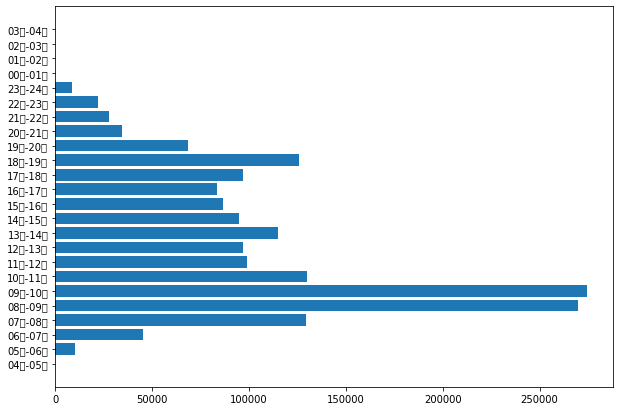

In [48]:
# 시간대별 승차인원 시각화하기
plt.figure(figsize=(10,7))
plt.barh(df_gangnam_out['시간대'], df_gangnam_out['하차건수'])
plt.show()

# 지하철 시간대별, 역별 이용현황 분석

## 시간대별 승차 현황

### 승차정보 집계 데이터 만들기

In [49]:
# df_in_202108카피하여 사용하기
df_in_202108_agg = df_in_202108.copy() 

In [ ]:
df_in_202108_agg

In [52]:
# 인덱스 변경('지하철역')
df_in_202108_agg.index = df_in_202108_agg['지하철역']

In [53]:
# 컬럼 삭제('사용월','호선명','지하철역')
df_in_202108_agg.drop(columns=['사용월','호선명','지하철역'], inplace=True)

In [55]:
# 행,열 합계
df_in_202108_agg.loc['sum'] = df_in_202108_agg.apply('sum', axis=0)

In [57]:
df_in_202108_agg['sum'] = df_in_202108_agg.apply('sum', axis=1)

In [ ]:
df_in_202108_agg.head(2)

### 시간대별 승차건수 

In [59]:
s_in = df_in_202108_agg.loc['sum'][:-1].sort_values()

In [ ]:
s_in = s_in.sort_index()
s_in

In [ ]:
x = s_in.index
y = s_in.values
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

### 지하철역별 승차건수

In [ ]:
df_in_202108_agg['sum'][:-1].sort_values(ascending=False).to_frame()

## 시간대별 하차 현황

### 하차정보 집계 테이블 만들기

In [64]:
# df_out_202108카피하여 사용하기
df_out_202108_agg = df_out_202108.copy()

In [65]:
# 인덱스 변경('지하철역')
df_out_202108_agg.index = df_out_202108_agg['지하철역']

In [66]:
# 컬럼 삭제('사용월','호선명','지하철역')
df_out_202108_agg.drop(columns=['사용월','호선명','지하철역'], inplace=True)

In [67]:
# 행,열 합계
df_out_202108_agg.loc['sum'] = df_out_202108_agg.apply('sum', axis=0)
df_out_202108_agg['sum'] = df_out_202108_agg.apply('sum', axis=1)

### 시간대별 하차 건수

In [ ]:
df_out_202108_agg.loc['sum'].sort_values()

### 지하철역별 하차건수

In [69]:
df_out_202108_agg['sum'][:-1].sort_values(ascending=False)[:10].to_frame()

,sum
지하철역,
강남,1819150
잠실(송파구청),1514327
신림,1467939
구로디지털단지,1339493
홍대입구,1273453
역삼,1154897
서울대입구(관악구청),1105337
신도림,1082008
삼성(무역센터),1077253
